Tracer experiments bathymetry figures

In [19]:
#KRM

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

from math import *

import scipy.io

import scipy as spy

%matplotlib inline

from netCDF4 import Dataset

import pylab as pl

import os 

import sys

import seaborn as sns

In [20]:
lib_path = os.path.abspath('../buildcanyon/PythonModulesMITgcm/') # Add absolute path to my python scripts
sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 


In [21]:

#CanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc'
CanyonGrid='/Users/Karina/Research/PhD/Tracers/TemporaryData/BARKLEY/run01/gridGlob.nc'

CanyonGridOut = Dataset(CanyonGrid)
#for dimobj in CanyonGridOut.variables.values():
#    print (dimobj)
CanyonState='/Users/Karina/Research/PhD/Tracers/TemporaryData/BARKLEY/run01/stateGlob.nc'
CanyonStateOut = Dataset(CanyonState)
#for dimobj in CanyonStateOut.variables.values():
#    print dimobj


In [22]:
# General input

nx = 360
ny = 360
nz = 90

nt = 19 # t dimension size 

z = CanyonStateOut.variables['Z']
#print(z[10])
Time = CanyonStateOut.variables['T']
#print(Time[:])

xc = rout.getField(CanyonGrid, 'XC') # x coords tracer cells

yc = rout.getField(CanyonGrid, 'YC') # y coords tracer cells

bathy = rout.getField(CanyonGrid, 'Depth')

hFacC = rout.getField(CanyonGrid, 'HFacC')
MaskC = rout.getMask(CanyonGrid, 'HFacC')

hFacW = rout.getField(CanyonGrid, 'HFacW') # (Z,Y,Xp1) for zonal fluxes
MaskW = rout.getMask(CanyonGrid,'HFacW') 

hFacS = rout.getField(CanyonGrid, 'HFacS') # (Z,Yp1,X) for meridional fluxes
MaskS = rout.getMask(CanyonGrid,'HFacS') 


In [23]:
sns.set()
sns.set_style('white')
sns.set_context('paper')

/Users/Karina/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


The shelf-break isobath (sb=291.44 m) upstream of the canyon corresponds to the y-index 198
The corresponding index for z is   (z(29)=147.50 m)


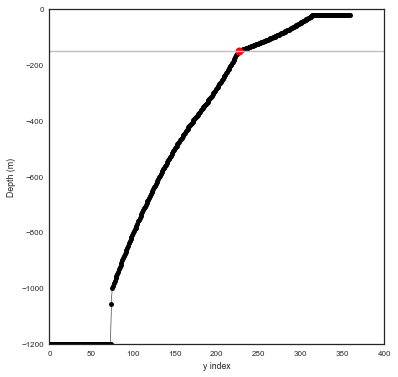

In [24]:
fig = plt.figure(figsize=(6,6))

CS = plt.plot(range(360),-bathy[:,120],'ko-',markersize=5,linewidth=0.5)
plt.plot(226,-bathy[226,120],'ro',markersize=8)
plt.axhline(y=z[29],xmin=0,xmax=360,linestyle='-', color='0.75')

plt.ylabel('Depth (m)')
plt.xlabel('y index')
print('The shelf-break isobath (sb=%.2f m) upstream of the canyon corresponds to the y-index 198' % bathy[198,120])
print('The corresponding index for z is   (z(29)=%.2f m)' % -z[29])

In [25]:
ix,iy = np.where((bathy>=146.8) & (bathy<=148.7))
print(np.shape(ix))


(360,)


/Users/Karina/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


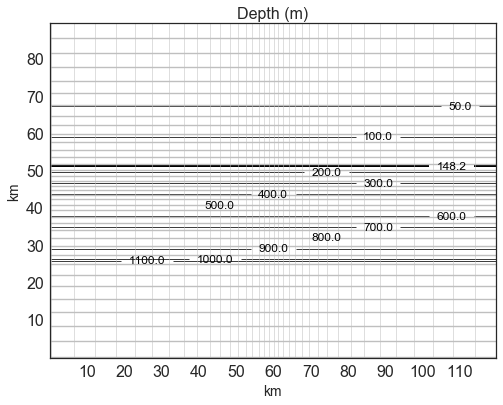

In [26]:
sns.set(context='paper', style='white', font='sans-serif', font_scale=2)

fig = plt.figure(figsize=(8,6))

plt.plot(xc[:,::10],yc[:,::10] ,'k',linewidth = 0.5,color = '0.75')

for ii in range(0,360,10):
    plt.axhline(y=yc[ii,1],xmin=0,xmax=360,linestyle='-', color='0.75')


levels = [50,100,148.17,200,300,400,500,600,700,800,900,1000,1100,1200]

CS = plt.contour(xc,yc,bathy,levels,colors='k',linewidths=[0.75,0.75,2,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75] )

plt.clabel(CS, 
           inline=1,
          fmt='%1.1f',
           fontsize=12)

    
plt.xticks(np.arange(0,120000,10000), [' ','10','20','30','40','50','60','70','80','90','100','110','120'])
plt.yticks(np.arange(0,90000,10000), [' ','10','20','30','40','50','60','70','80','90'])

plt.xlabel('km',fontsize=14)
plt.ylabel('km',fontsize=14)

plt.title('Depth (m)',fontsize=16)
